In [251]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


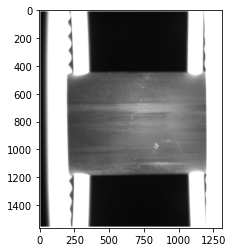

In [252]:
# img_test = cv.imread('datasets/normal/nodefect(50).bmp')
img_test = cv.imread('datasets/unnormal/defection(1).bmp')
img_test = cv.copyMakeBorder(img_test,10,10,10,10,
                       cv.BORDER_CONSTANT,value=[255, 255, 255])
plt.imshow(img_test)


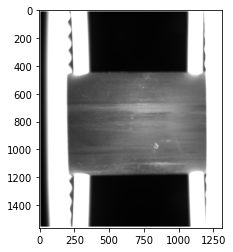

In [253]:
img_test_gray = cv.imread('datasets/unnormal/defection(1).bmp', cv.IMREAD_GRAYSCALE)
# img_test_gray = cv.imread('datasets/normal/nodefect(50).bmp', cv.IMREAD_GRAYSCALE)
img_test_gray = cv.copyMakeBorder(img_test_gray,10,10,10,10,
                       cv.BORDER_CONSTANT,value=[255, 255, 255])
plt.imshow(img_test_gray, cmap='gray')


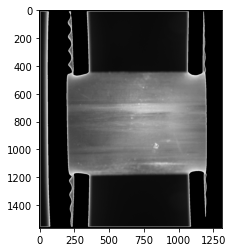

In [254]:
# copy for test
img_test_copy = img_test_gray.copy()

img_test_copy = cv.GaussianBlur(img_test_copy, (9, 9), 0)
_, img_test_copy = cv.threshold(img_test_copy, 220, 255, cv.THRESH_TOZERO_INV)
plt.imshow(img_test_copy, cmap='gray')


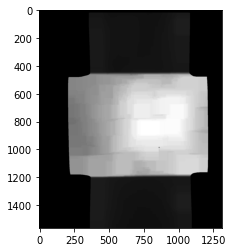

In [255]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (10, 10))
# kernel = np.ones((30, 30), np.uint8)
img_test_copy = cv.erode(img_test_copy, kernel, iterations=10)
img_test_copy = cv.dilate(img_test_copy, kernel, iterations=10)
plt.imshow(img_test_copy, cmap='gray')


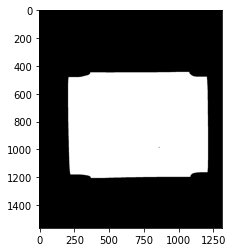

In [256]:
_, img_test_copy = cv.threshold(img_test_copy, 15, 255, cv.THRESH_BINARY)
plt.imshow(img_test_copy, cmap='gray')

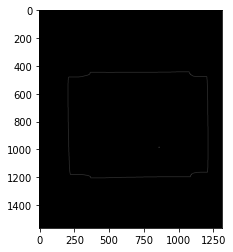

In [257]:
# after the erode we can now use canny method to find the edge
img_test_copy_canny = cv.Canny(img_test_copy, 0, 50, apertureSize=3 )
kernel = cv.getStructuringElement(cv.MORPH_RECT, (20, 20))
# img_test_copy = cv.erode(img_test_copy, kernel, iterations=10)
plt.imshow(img_test_copy_canny, cmap='gray')


In [258]:

(contours, _) = cv.findContours(img_test_copy, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
# print the number of contours
print('the count of contours is %d \n' % (len(contours)))


the count of contours is 2 



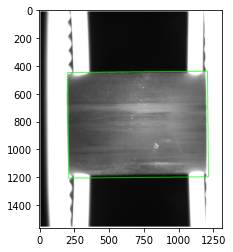

In [259]:
# c = sorted(contours, key=cv.contourArea, reverse=True)[0]

area = []
for i in range(len(contours)):
    area.append(cv.contourArea(contours[i]))
c = np.argmax(area)

rect = cv.minAreaRect(contours[c])
box = np.int0(cv.boxPoints(rect))

img_copy = img_test_gray.copy()
draw_img = cv.drawContours(img_test.copy(), [box], -1, (0, 255, 0), 3)


# img_copy = img_test_gray.copy()
# cv.drawContours(img_copy, contours, -1, (120, 120, 120), 40)
plt.imshow(draw_img, cmap='gray')


In [260]:
print(tuple(box[0]))


(213, 1206)


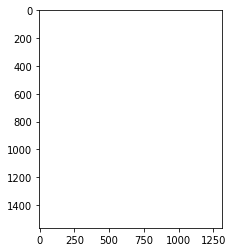

In [261]:
src_h, src_w = img_test.shape[:2]
mask = np.full((src_h, src_w), 255, dtype=np.uint8)

mask = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

plt.imshow(mask, cmap='gray')


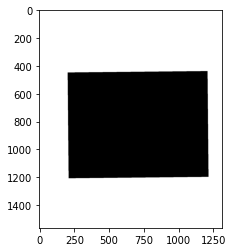

In [262]:
# triangle = np.array([[0, 0], [1500, 800], [500, 400]])
# pts = triangle.reshape((-1, 1, 2))
# print(pts)
cv.fillConvexPoly(mask, box, (0, 0, 0))
plt.imshow(mask, cmap='gray')


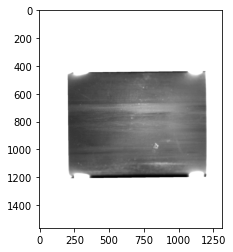

In [263]:
mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)

result_img = cv.add(img_test_gray.copy(), mask)

plt.imshow(result_img, cmap='gray')


# # create mask
# src_h, src_w = img_test.shape[:2]
# mask = img_test.copy()
# for h in range(src_h):
#     for w in range(src_w):
#         result = cv.pointPolygonTest(c, (w, h), False)
#         if result < 0:
#             mask[h][w] = 255
#
#
# # cv.rectangle(mask, tuple(box[0]), tuple(box[-1]), (255, 0, 0), -1)
# plt.imshow(mask, cmap='gray')

